In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 선형 회귀 분석
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from stats.tools.eval_measures import rmse

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz


import ast

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)*100)


matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


# 시계열 분석

In [2]:
df_raw_sales=pd.read_csv('/home/pirl/Downloads/wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df_raw_sales.head()


,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


In [3]:
df_sales = df_raw_sales.drop('Unnamed: 0',axis=1)

## 변동 추세 확인

In [4]:
df_new_time=df_sales.groupby(['date']).agg(np.sum)

In [5]:
df_new_time.head()

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900


In [6]:
df_new_time.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', length=184, freq=None)

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


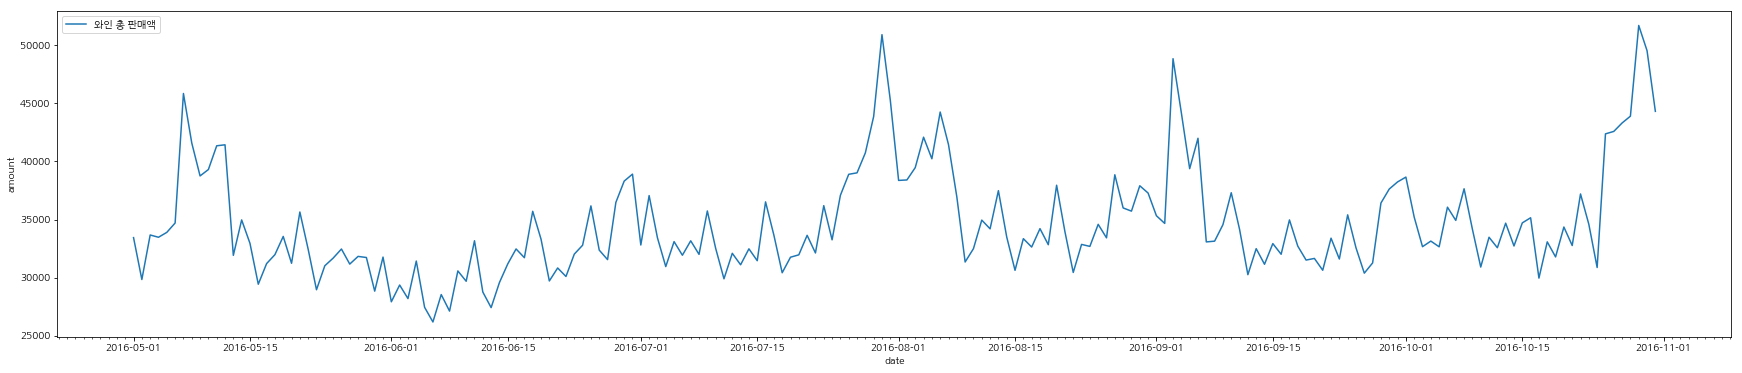

In [7]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


## 시계열 분석 : 데이터 분할

In [8]:
train_size=0.9
len_idx=len(df_new_time.index)
mask=(np.arange(len_idx)/len_idx)<train_size
print(mask)

df_new_time_train=df_new_time[mask]
df_new_time_test=df_new_time[~mask]
print(df_new_time_train.shape)
print(df_new_time_test.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [9]:
# df_new_time_train=df_new_time[df_new_time.index<='2016-03-22']
# df_new_time_test=df_new_time[df_new_time.index>'2016-03-22']
# df_new_time_test.head()

In [10]:
df_new_time_train

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900
2016-05-06,34705
2016-05-07,45835
2016-05-08,41585
2016-05-09,38750


In [11]:
df_new_time_train.shift(1)

,amount
date,
2016-05-01,NaN
2016-05-02,33450.0
2016-05-03,29850.0
2016-05-04,33675.0
2016-05-05,33480.0
2016-05-06,33900.0
2016-05-07,34705.0
2016-05-08,45835.0
2016-05-09,41585.0


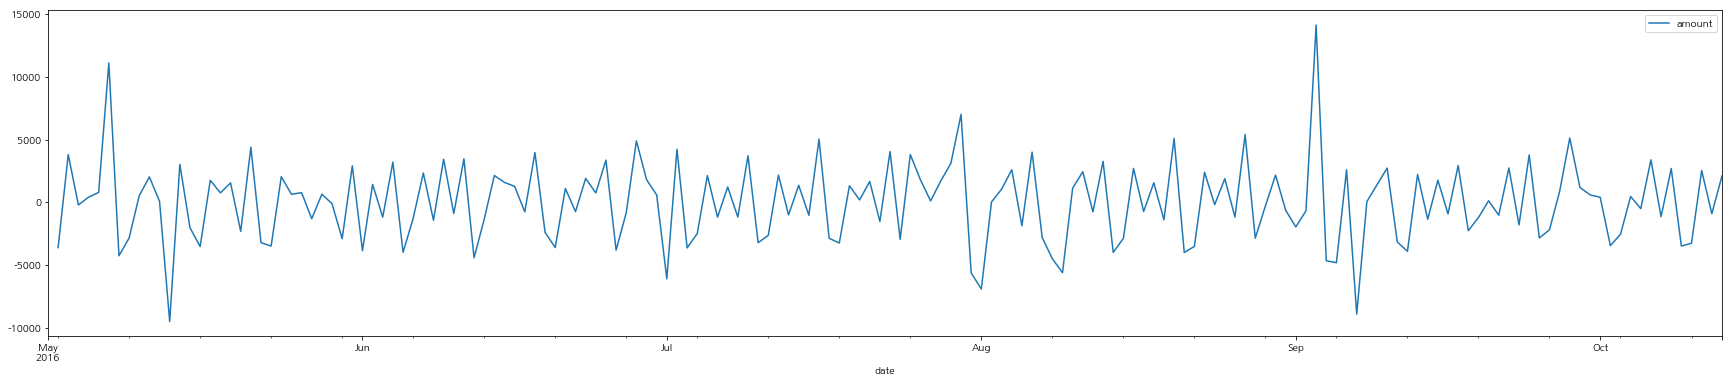

In [12]:
df_new_time_diff1=df_new_time_train-df_new_time_train.shift(1)
df_new_time_diff1.plot(figsize=(30,6))

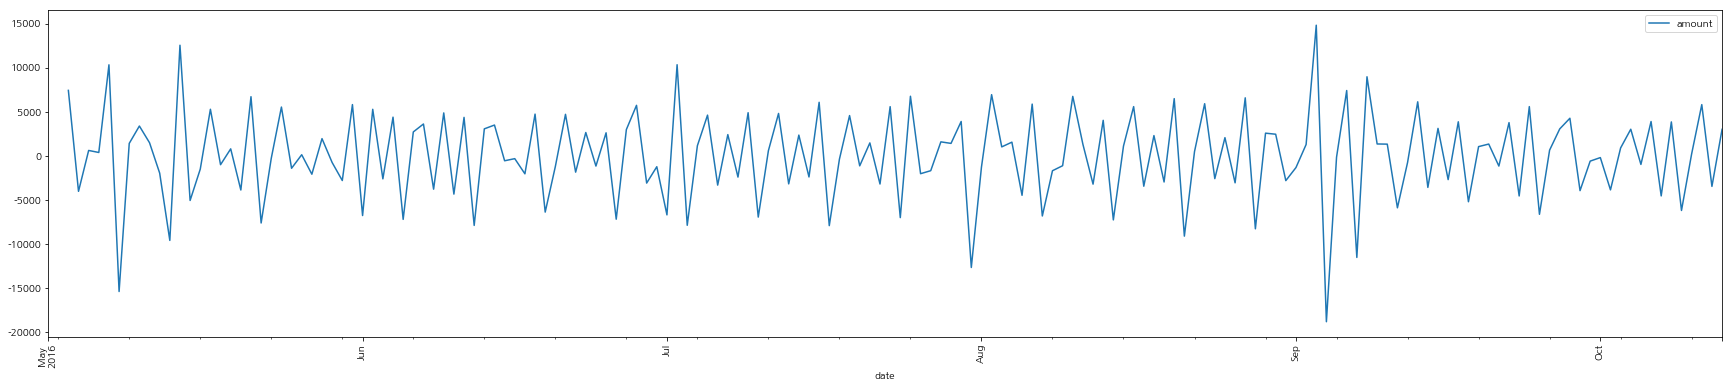

In [13]:
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(DayLocator())

df_new_time_diff2=df_new_time_diff1 - df_new_time_diff1.shift(1)
df_new_time_diff2.plot(figsize=(30,6),rot=90)



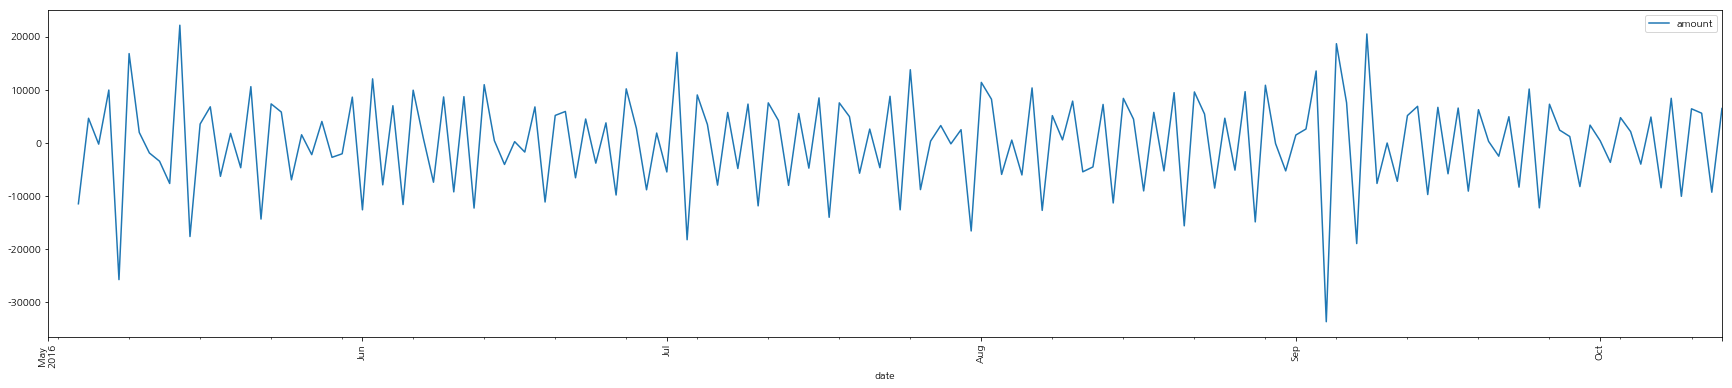

In [14]:
df_new_time_diff3=df_new_time_diff2 - df_new_time_diff2.shift(1)
df_new_time_diff3.plot(figsize=(30,6),rot=90)



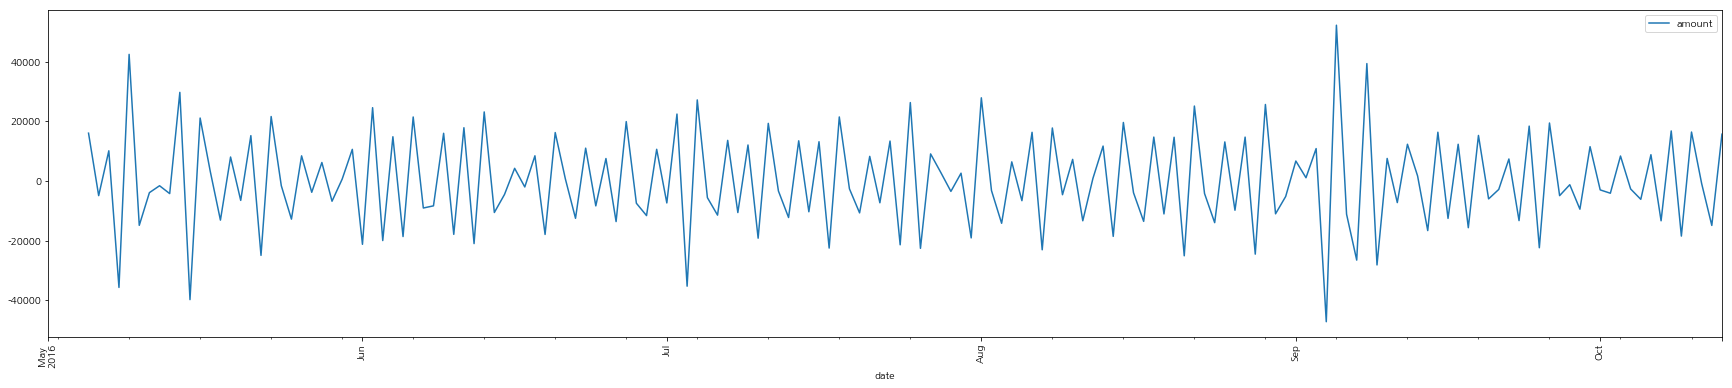

In [15]:
df_new_time_diff4=df_new_time_diff3 - df_new_time_diff3.shift(1)
df_new_time_diff4.plot(figsize=(30,6),rot=90)



In [16]:
df_new_time_test

,amount
date,
2016-10-14,32730
2016-10-15,34715
2016-10-16,35155
2016-10-17,29970
2016-10-18,33085
2016-10-19,31790
2016-10-20,34360
2016-10-21,32770
2016-10-22,37200


## 시계열 분석 : 자기상관 함수

In [17]:
df_new_time_train.head()

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900


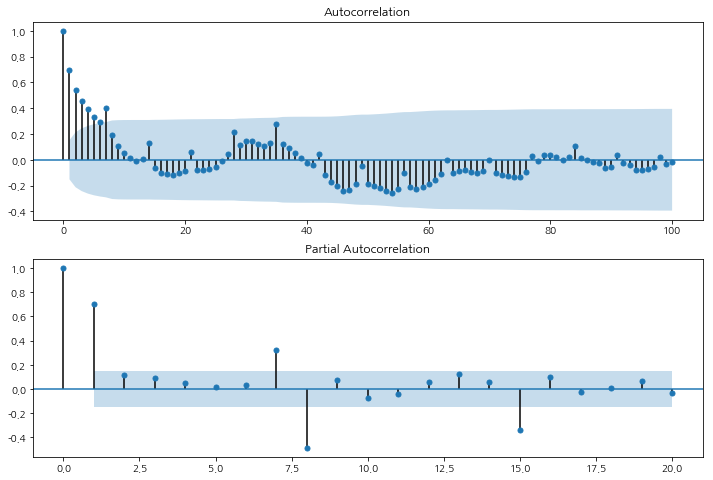

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_lag=100
pacf_lag=20
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_new_time_train['amount'],lags=acf_lag,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_new_time_train['amount'],lags=pacf_lag,ax=ax2)


## 예측 및 결과 해석

In [19]:
df_new_time_test.head()

,amount
date,
2016-10-14,32730
2016-10-15,34715
2016-10-16,35155
2016-10-17,29970
2016-10-18,33085


In [20]:
df_new_time_test.ix[0]

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


amount    32730
Name: 2016-10-14 00:00:00, dtype: int64

In [21]:
df_new_time_test.index

DatetimeIndex(['2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17',
               '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21',
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a Date

                             ARIMA Model Results                              
Dep. Variable:              D2.amount   No. Observations:                  164
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1603.571
Method:                       css-mle   S.D. of innovations           4263.415
Date:                Tue, 06 Aug 2019   AIC                           3213.143
Time:                        16:53:07   BIC                           3222.443
Sample:                    05-03-2016   HQIC                          3216.918
                         - 10-13-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.6092    214.908      0.059      0.953    -408.603     433.821
ar.L1.D2.amount    -0.5525      0.065     -8.469      0.000      -0.680      -0.425
                                

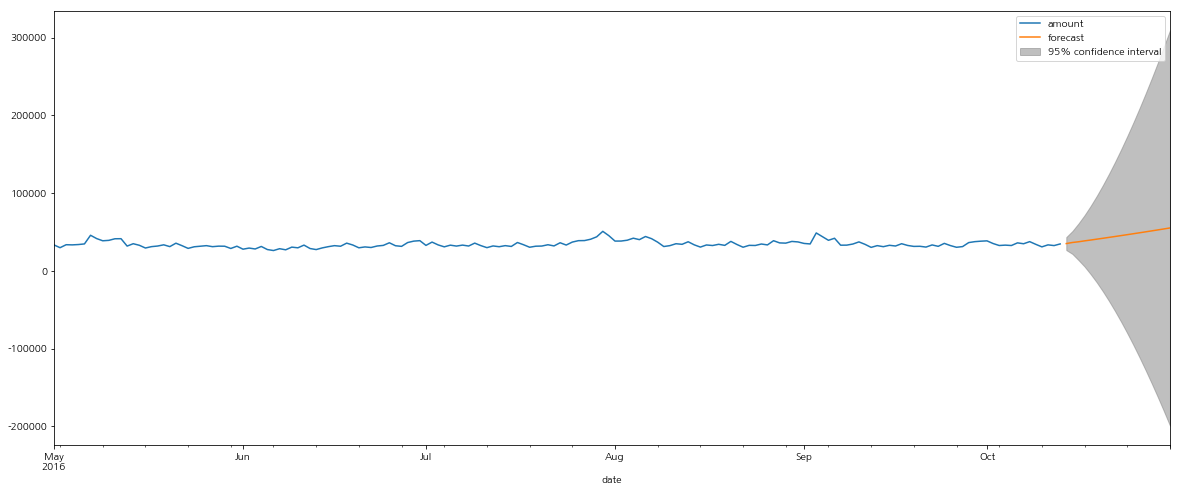

In [22]:
from statsmodels.tsa.arima_model import ARIMA

ts_model=ARIMA(df_new_time_train,order=(1,2,0))
ts_result=ts_model.fit(trend='c',full_output=True)
print(ts_result.summary())

start_time=df_new_time_test.index.min()
end_time=df_new_time_test.index.max()
fig,ax=plt.subplots(figsize=(20,8))
ax=df_new_time_train.plot(ax=ax)
fig=ts_result.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)


# model_fit.forecast(steps=1)


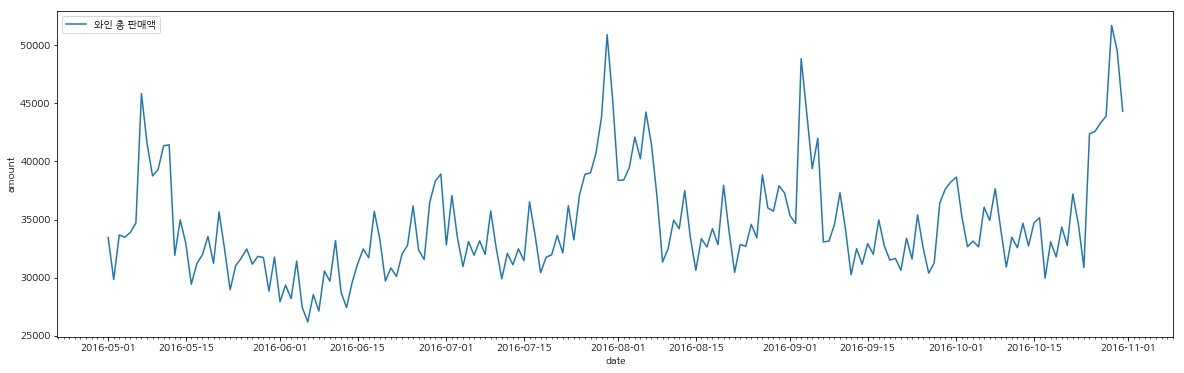

In [23]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(20, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


In [24]:
df_new_time_train.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11',
               '2016-10-12', '2016-10-13'],
              dtype='datetime64[ns]', name='date', length=166, freq=None)

In [25]:
df_new_time_test.index

DatetimeIndex(['2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17',
               '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21',
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [26]:
df_new_time_test.ix[start_time]

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


amount    32730
Name: 2016-10-14 00:00:00, dtype: int64

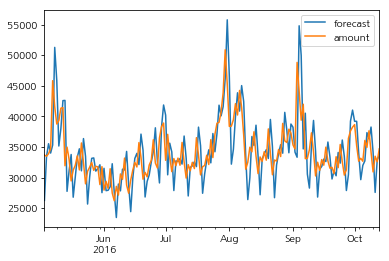

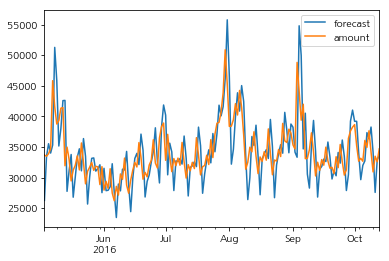

In [27]:
ts_result.plot_predict()

In [28]:
df_new_time

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900
2016-05-06,34705
2016-05-07,45835
2016-05-08,41585
2016-05-09,38750


In [29]:
df_new_time.index.min()

Timestamp('2016-05-01 00:00:00')

In [30]:
y_pred

NameError: name 'y_pred' is not defined

In [31]:
start_time=df_new_time.index.min()
y_pred=ts_result.predict(start=pd.to_datetime('2016-10-14'),end=end_time,typ='levels')
df_new=df_new_time.copy()
df_new['예측값']=y_pred
df_new.head()

,amount,예측값
date,,
2016-05-01,33450,NaN
2016-05-02,29850,NaN
2016-05-03,33675,NaN
2016-05-04,33480,NaN
2016-05-05,33900,NaN


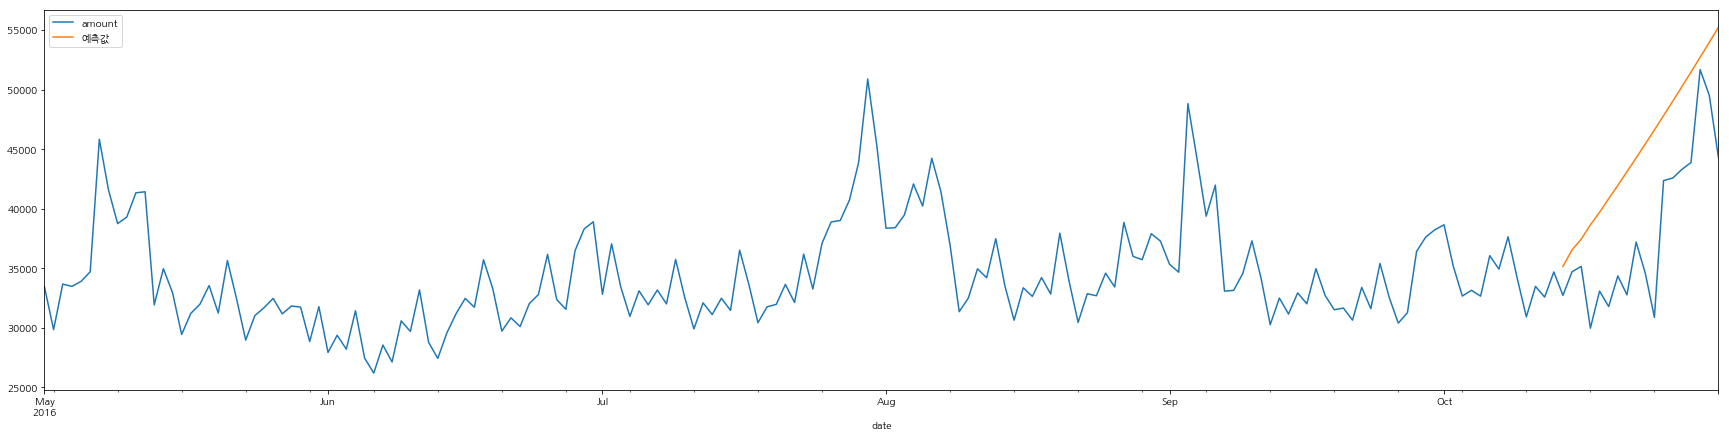

In [32]:
df_new.plot(y=['amount','예측값'],figsize=(30,7))

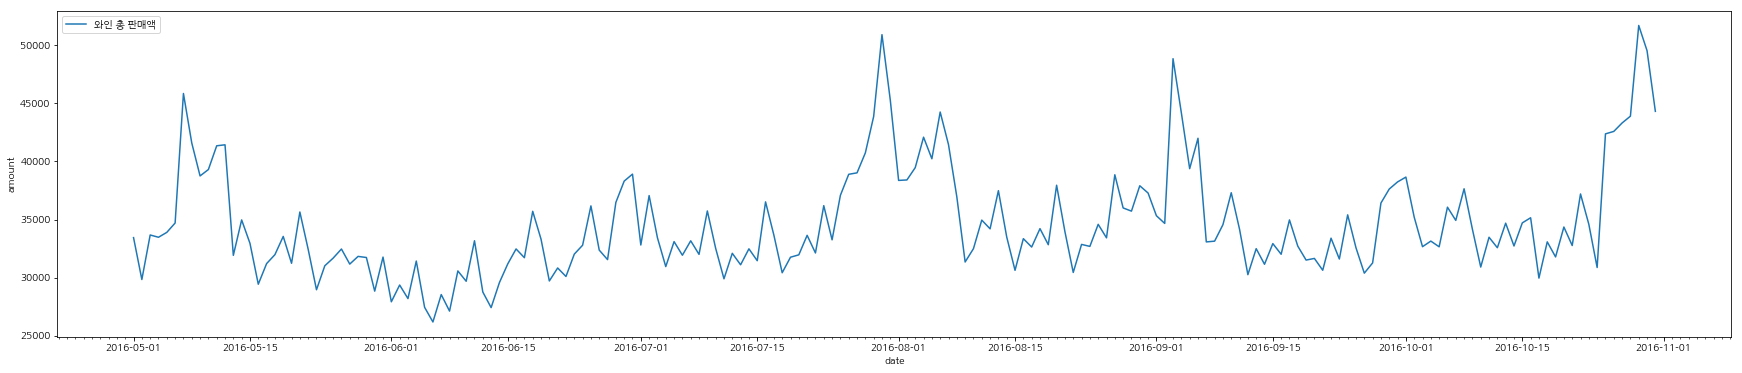

In [33]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


In [34]:
df_sales.head()

,date,gender,age,job,marital,province,city,purchase,amount
0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


# arimax

In [35]:
df_raw_sales=pd.read_csv('/home/pirl/빅데이터프로젝트/wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df_raw_sales.head()



FileNotFoundError: [Errno 2] No such file or directory: '/home/pirl/빅데이터프로젝트/wine_data_sales.csv'

In [36]:
df_sales = df_raw_sales.drop('Unnamed: 0',axis=1)

## 변동 추세 확인

In [37]:
df_new_time=df_sales.groupby(['date']).agg(np.sum)

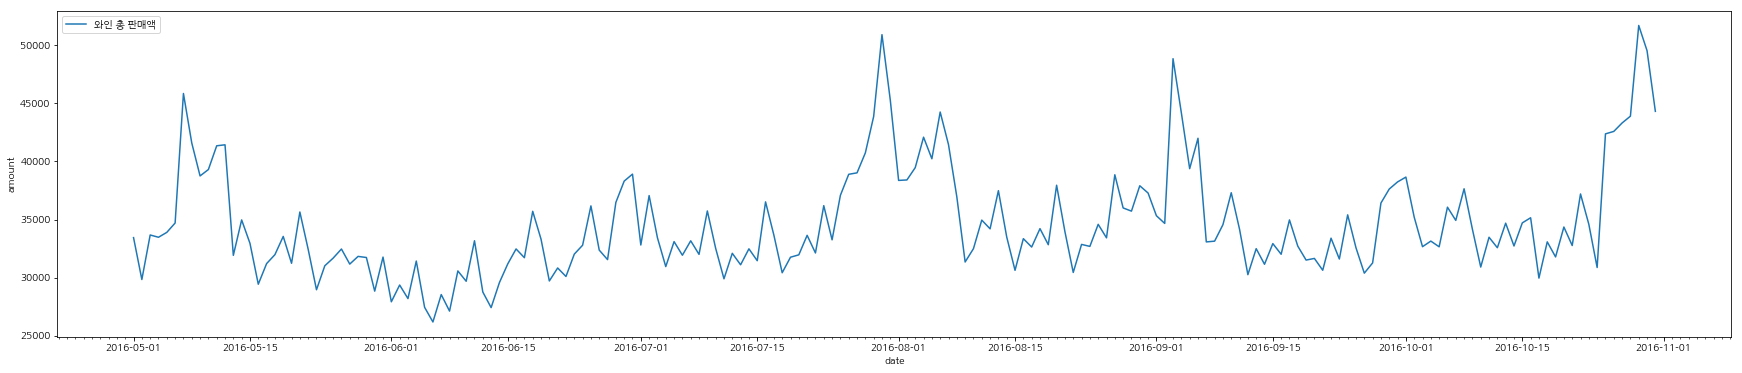

In [377]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


## 더미 변수 생성

In [378]:
(df_new[['amount']] - df_new[['amount']].shift(1)).sort_values(['amount'])

,amount
date,
2016-05-13,-9500.0
2016-09-07,-8905.0
2016-08-01,-6900.0
2016-07-01,-6090.0
2016-07-31,-5625.0
2016-08-09,-5600.0
2016-10-31,-5215.0
2016-10-17,-5185.0
2016-09-05,-4800.0


In [379]:
diff1 = df_new[['amount']] - df_new[['amount']].shift(1)
diff1.head()

,amount
date,
2016-05-01,NaN
2016-05-02,-3600.0
2016-05-03,3825.0
2016-05-04,-195.0
2016-05-05,420.0


In [380]:
(diff1 + diff1.shift(1)).sort_values(['amount'],ascending=False)

,amount
date,
2016-09-03,13495.0
2016-05-07,11935.0
2016-10-26,11695.0
2016-07-30,10160.0
2016-09-04,9505.0
2016-10-29,8380.0
2016-10-25,7770.0
2016-05-08,6880.0
2016-06-29,6745.0


In [381]:
(df_new[['amount']] - df_new[['amount']].shift(1)).sort_values(['amount'],ascending=False).head(20)

,amount
date,
2016-09-03,14155.0
2016-10-25,11485.0
2016-05-07,11130.0
2016-10-29,7795.0
2016-07-30,7030.0
2016-08-27,5420.0
2016-09-28,5145.0
2016-08-20,5110.0
2016-07-16,5055.0


In [38]:
df_new = df_new_time.copy()

# #month one hot encoding
# df_new['month'] = df_new.index.month
# month_dummies = pd.get_dummies(df_new['month'],prefix='month')
# df_new['month_1']=0
# df_new['month_2']=0
# df_new['month_3']=0
# df_new['month_4']=0
# df_new = pd.concat([df_new, month_dummies], axis=1, join_axes=[df_new.index]).drop(['month'],axis=1)
# df_new['month_11']=0
# df_new['month_12']=0

#dayofweek one hot encoding
df_new['weekday'] = df_new.index.weekday
week_dummies = pd.get_dummies(df_new['weekday'],prefix='weekday')
df_new = pd.concat([df_new, week_dummies], axis=1, join_axes=[df_new.index]).drop(['weekday'],axis=1)

#Satday,Sunday
df_new['weekend'] = (df_new.index.weekday>4).astype(int)

#quarter
df_new['quarter'] = df_new.index.month
df_new['quarter'][df_new['quarter']==1]='1Q'
df_new['quarter'][df_new['quarter']==2]='1Q'
df_new['quarter'][df_new['quarter']==3]='1Q'
df_new['quarter'][df_new['quarter']==4]='2Q'
df_new['quarter'][df_new['quarter']==5]='2Q'
df_new['quarter'][df_new['quarter']==6]='2Q'
df_new['quarter'][df_new['quarter']==7]='3Q'
df_new['quarter'][df_new['quarter']==8]='3Q'
df_new['quarter'][df_new['quarter']==9]='3Q'
df_new['quarter'][df_new['quarter']==10]='4Q'
df_new['quarter'][df_new['quarter']==11]='4Q'
df_new['quarter'][df_new['quarter']==12]='4Q'
quarter_dummies = pd.get_dummies(df_new['quarter'],prefix='quarter')
df_new['quarter_1Q']=0
df_new = pd.concat([df_new, quarter_dummies], axis=1, join_axes=[df_new.index]).drop(['quarter'],axis=1)



# #holiday
# holiday=['2016-01-01', # 1월 신정 연휴
#         '2016-01-02', # 1월 신정 연휴
#         '2016-01-03', # 1월 신정 연휴
#         '2016-02-06', # 2월 설날 연휴
#         '2016-02-07', # 2월 설날 연휴
#         '2016-02-08', # 2월 설날 연휴
#         '2016-02-09', # 2월 설날 연휴
#         '2016-02-10', # 2월 설날 연휴
#         '2016-03-01', # 3월 3.1절
#         '2016-04-13', # 4월 국회의원 선거일
#         '2016-05-05', # 5월 어린이날
#         '2016-05-14', # 5월 석가탄신일
#         '2016-06-06', # 6월 현충일
#         '2016-08-15', # 8월 광복절
#         '2016-09-14', # 9월 추석 연휴
#         '2016-09-15', # 9월 추석 연휴
#         '2016-09-16', # 9월 추석 연휴
#         '2016-09-17', # 9월 추석 연휴
#         '2016-09-18', # 9월 추석 연휴
#         '2016-10-01', # 10월 개천절 연휴
#         '2016-10-02', # 10월 개천절 연휴
#         '2016-10-03', # 10월 개천절 연휴
#         '2016-12-25'] # 12월 크리스마스
# df_new['holiday'] = (df_new.index.isin(holiday)).astype(int)

# querter_end
querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
               '2016-06-29', '2016-06-30', # 2분기 말
               '2016-09-29', '2016-09-30', # 3분기 말
               '2016-12-30', '2016-12-31'] # 4분기 말
df_new['querter_end'] = (df_new.index.isin(querter_end)).astype(int)


# holiday
# special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
#                '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
#                '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
#                '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
#                '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
#                '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
#                '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
#                '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
#                '2016-10-29', '2016-10-30', '2016-10-31', 
#                '2016-12-24', '2016-12-25', '2016-12-22016-08-09	-5600.0
#                '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',] # 연말


special_event=['2016-09-03',
                '2016-05-07',
                '2016-10-26',
                '2016-07-30',
                '2016-09-04',
                '2016-10-29',
                '2016-10-25',
                '2016-05-08',
                '2016-06-29',
                '2016-09-29',
                '2016-09-28',
                '2016-10-30',
                '2016-07-26',
                '2016-07-29',
                '2016-08-27',
                '2016-09-10',
                '2016-06-25',
                '2016-06-28',
                '2016-07-16','2016-12-24','2016-12-25']


# special_event=['2016-09-03','2016-10-25','2016-05-07',
#         '2016-10-29','2016-07-30','2016-08-27','2016-09-28',
#         '2016-08-20','2016-07-16','2016-06-28']

df_new['special_event'] = (df_new.index.isin(special_event)).astype(int)

# # down_event
# down_event=['2016-05-13','2016-08-08','2016-08-09','2016-09-07','2016-11-01','2016-11-02']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)

# # down_event
down_event=['2016-05-13','2016-09-07','2016-08-01',
            '2016-07-01','2016-07-31',
            '2016-08-09','2016-10-31','2016-10-17',
            '2016-09-05','2016-09-04',
            '2016-11-01','2016-11-02','2016-11-03']
df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)


# down_event=['2016-05-13','2016-09-07','2016-08-01','2016-07-01',
#             '2016-07-31','2016-08-09','2016-10-31',
#             '2016-10-17','2016-09-05','2016-09-04',
#             '2016-11-01','2016-11-02','2016-11-03','2016-11-04']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)





/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a 

In [383]:
df_new.columns

Index(['amount', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weekend', 'quarter_1Q',
       'quarter_2Q', 'quarter_3Q', 'quarter_4Q', 'querter_end',
       'special_event', 'down_event'],
      dtype='object')

## train size

In [39]:
train_size=0.9
len_idx=len(df_new.index)
mask=(np.arange(len_idx)/len_idx)<train_size
# print(mask)

df_new_train=df_new[mask]
df_new_test=df_new[~mask]
print(df_new_train.shape)
print(df_new_test.shape)

train_start=df_new_train.index.min()
train_end=df_new_train.index.max()
test_start=df_new_test.index.min()
test_end=df_new_test.index.max()

(166, 16)
(18, 16)


## arimax 모델 생성

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


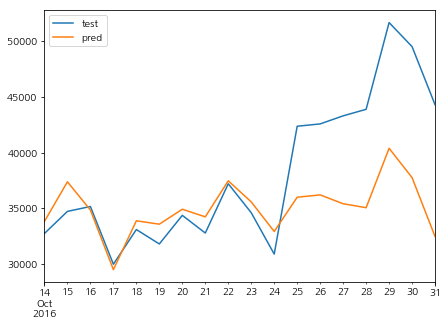

In [40]:
from sklearn.metrics import mean_squared_error

arimax = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
                               order=(2,1,2),
                               seasonal_order=(2,1,2,5),
                               #trend='n', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               freq='D',
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit()

pred = arimax.predict(train_end,test_end,exog = df_new_test.drop(['amount'],axis = 1))[1:]
arimax.summary()
#We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

pd.DataFrame({'test':df_new_test['amount'],'pred':pred}).plot(figsize=(7,5))
plt.show()

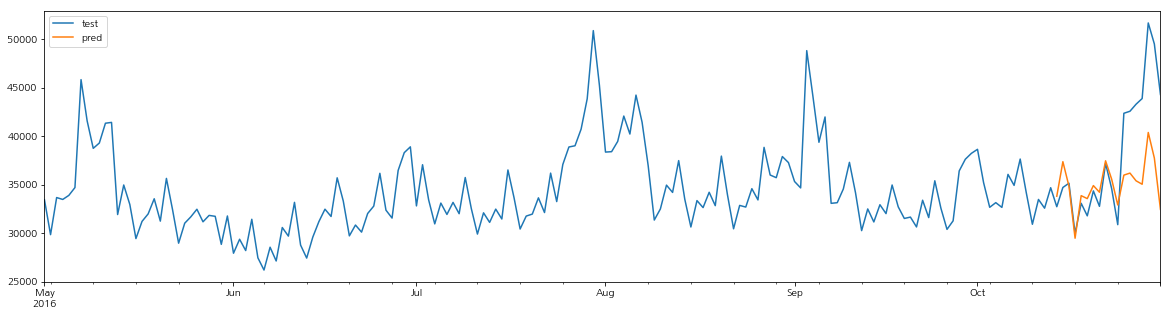

In [41]:
pd.DataFrame({'test':df_new['amount'],'pred':pred}).plot(figsize=(20,5))
plt.show()

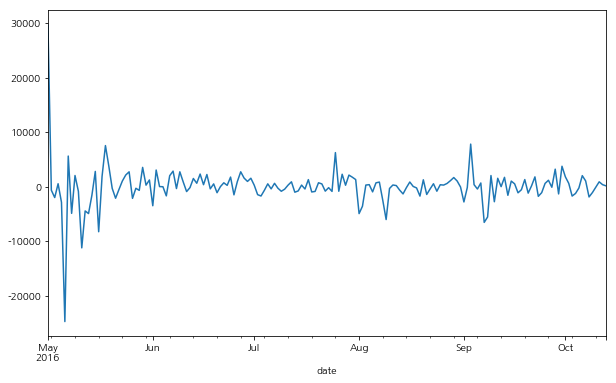

In [42]:
arimax.resid.plot(figsize=(10,6))
plt.show()

## 그래프 그리기

### 예측 데이터 프레임 생성

In [43]:
df_forecast = pd.DataFrame(index=pd.date_range("2016-11-01", "2016-11-07"))
df_forecast['amount'] = 0


In [44]:
#month one hot encoding
df_forecast['month'] = df_forecast.index.month
month_dummies = pd.get_dummies(df_forecast['month'],prefix='month')
df_forecast = pd.concat([df_forecast, month_dummies], axis=1, join_axes=[df_forecast.index]).drop(['month'],axis=1)

#dayofweek one hot encoding
df_forecast['weekday'] = df_forecast.index.weekday
week_dummies = pd.get_dummies(df_forecast['weekday'],prefix='weekday')
df_forecast = pd.concat([df_forecast, week_dummies], axis=1, join_axes=[df_forecast.index]).drop(['weekday'],axis=1)

#Satday,Sunday
df_forecast['weekend'] = (df_forecast.index.weekday>4).astype(int)

#quarter
df_forecast['quarter'] = df_forecast.index.month
df_forecast['quarter'][df_forecast['quarter']==1]='1Q'
df_forecast['quarter'][df_forecast['quarter']==2]='1Q'
df_forecast['quarter'][df_forecast['quarter']==3]='1Q'
df_forecast['quarter'][df_forecast['quarter']==4]='2Q'
df_forecast['quarter'][df_forecast['quarter']==5]='2Q'
df_forecast['quarter'][df_forecast['quarter']==6]='2Q'
df_forecast['quarter'][df_forecast['quarter']==7]='3Q'
df_forecast['quarter'][df_forecast['quarter']==8]='3Q'
df_forecast['quarter'][df_forecast['quarter']==9]='3Q'
df_forecast['quarter'][df_forecast['quarter']==10]='4Q'
df_forecast['quarter'][df_forecast['quarter']==11]='4Q'
df_forecast['quarter'][df_forecast['quarter']==12]='4Q'
quarter_dummies = pd.get_dummies(df_forecast['quarter'],prefix='quarter')
df_forecast = pd.concat([df_forecast, quarter_dummies], axis=1, join_axes=[df_forecast.index]).drop(['quarter'],axis=1)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A val

In [45]:

#holiday
holiday=['2016-01-01', # 1월 신정 연휴
        '2016-01-02', # 1월 신정 연휴
        '2016-01-03', # 1월 신정 연휴
        '2016-02-06', # 2월 설날 연휴
        '2016-02-07', # 2월 설날 연휴
        '2016-02-08', # 2월 설날 연휴
        '2016-02-09', # 2월 설날 연휴
        '2016-02-10', # 2월 설날 연휴
        '2016-03-01', # 3월 3.1절
        '2016-04-13', # 4월 국회의원 선거일
        '2016-05-05', # 5월 어린이날
        '2016-05-14', # 5월 석가탄신일
        '2016-06-06', # 6월 현충일
        '2016-08-15', # 8월 광복절
        '2016-09-14', # 9월 추석 연휴
        '2016-09-15', # 9월 추석 연휴
        '2016-09-16', # 9월 추석 연휴
        '2016-09-17', # 9월 추석 연휴
        '2016-09-18', # 9월 추석 연휴
        '2016-10-01', # 10월 개천절 연휴
        '2016-10-02', # 10월 개천절 연휴
        '2016-10-03', # 10월 개천절 연휴
        '2016-12-25'] # 12월 크리스마스
df_forecast['holiday'] = (df_forecast.index.isin(holiday)).astype(int)

#querter_end
querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
               '2016-06-29', '2016-06-30', # 2분기 말
               '2016-09-29', '2016-09-30', # 3분기 말
               '2016-12-30', '2016-12-31'] # 4분기 말
df_forecast['querter_end'] = (df_forecast.index.isin(querter_end)).astype(int)


#holiday
special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
               '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
               '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
               '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
               '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
               '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
               '2016-10-29', '2016-10-30', '2016-10-31', '2016-12-24', '2016-12-25',
               '2016-12-30', '2016-12-31'] # 코리안 세일 페스타

df_forecast['special_event'] = (df_forecast.index.isin(special_event)).astype(int)



In [46]:
df_forecast.index

DatetimeIndex(['2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04',
               '2016-11-05', '2016-11-06', '2016-11-07'],
              dtype='datetime64[ns]', freq='D')

In [47]:
for col in df_new_train.columns:
    if col not in df_forecast.columns:
        print(col)
        df_forecast[col]=0

quarter_1Q
quarter_2Q
quarter_3Q
down_event


In [48]:
df_forecast

,amount,month_11,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekend,quarter_4Q,holiday,querter_end,special_event,quarter_1Q,quarter_2Q,quarter_3Q,down_event
2016-11-01,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2016-11-02,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2016-11-03,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2016-11-04,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2016-11-05,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2016-11-06,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
2016-11-07,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 1

In [49]:
mod = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
                               order=(2,1,6),
                               seasonal_order=(0,0,0,0),
                               #trend='ct', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
fit_res = mod.fit(disp=False)
res = mod.filter(fit_res.params)

# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

# Dynamic predictions
predict_dy = res.get_prediction(dynamic='2016-10-01')
predict_dy_ci = predict_dy.conf_int()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


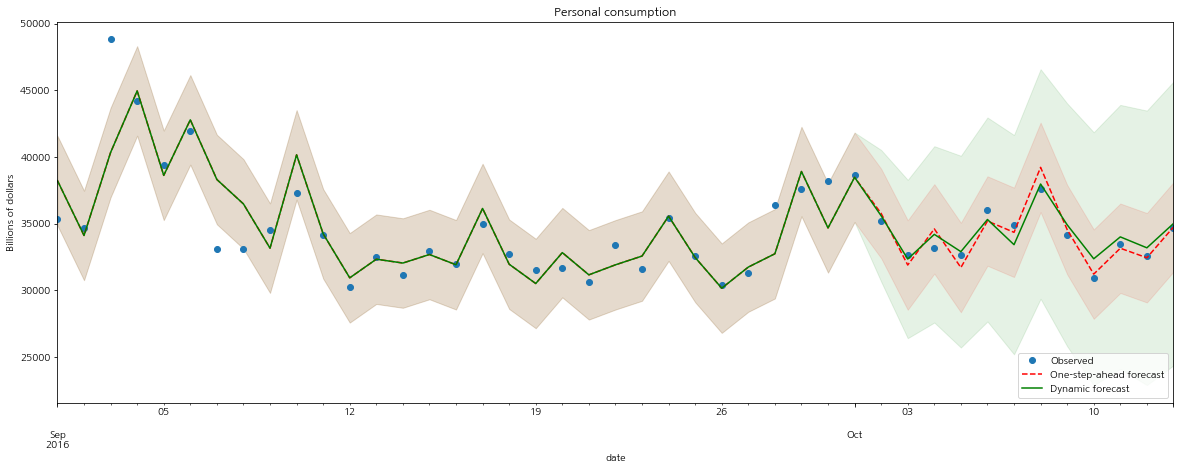

In [50]:
# Graph
fig, ax = plt.subplots(figsize=(20,7))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
df_new_train.loc['2016-09-01':, 'amount'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2016-09-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['2016-09-01':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

AttributeError: 'NotImplementedType' object has no attribute 'reindex_like'

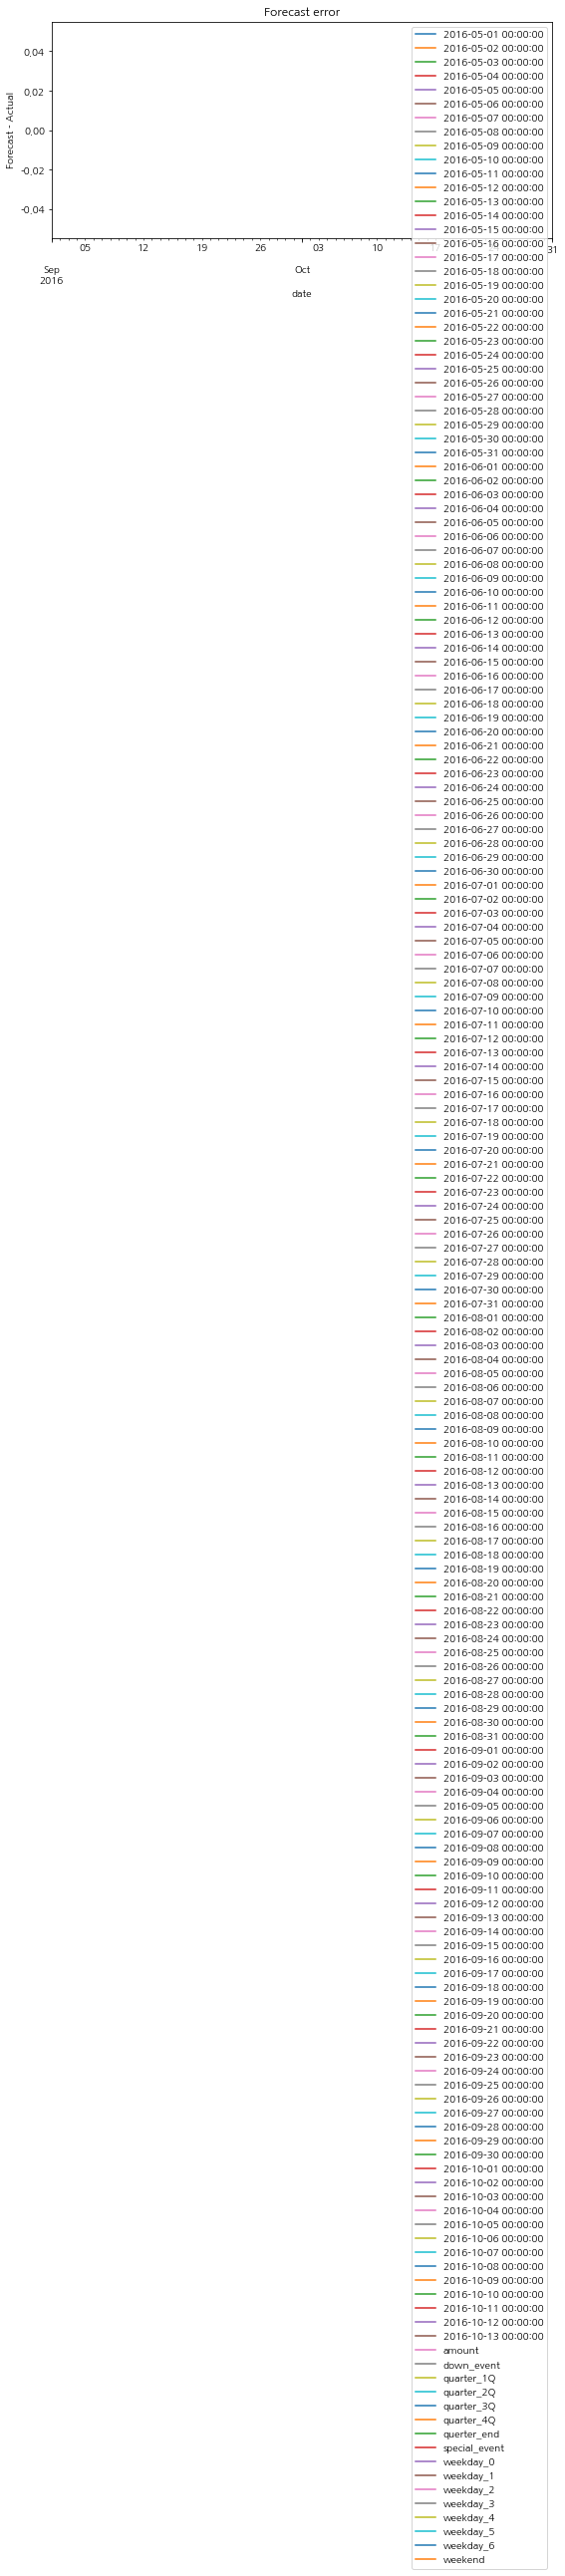

In [51]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - df_new
predict_error.loc['2016-09-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['2016-09-01':].copy()
ci.iloc[:,0] -= df_new.loc['2016-09-01':]
ci.iloc[:,1] -= df_new.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['2016-09-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['2016-09-01':].copy()
ci.iloc[:,0] -= df_new.loc['2016-09-01':]
ci.iloc[:,1] -= df_new.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

In [ ]:
yhat = arimax.forecast(5)

predicted = arimax.forecast(steps=5, exog=np.array(df_new_train['amount']).reshape(-1,1))[0]


### 2

In [651]:
arimax = sm.tsa.statespace.SARIMAX(df_new_train[['amount']],
                               order=(7,1,7),
                               seasonal_order=(0,0,0,0),
                               #trend='n', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               freq='D',
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit()

# pred = arimax.predict(exog = df_new_test.drop(['amount'],axis = 1))[1:]
# arimax.summary()
# #We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

# pd.DataFrame({'test':df_new['amount'],'pred':pred}).plot(figsize=(20,5))
# plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


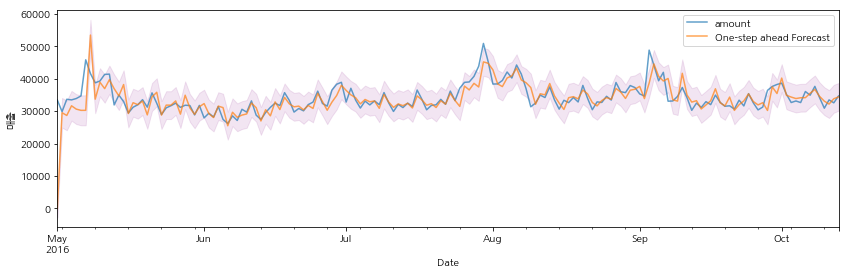

In [662]:
plt.figure()
pred = arimax.get_prediction(start=train_start, dynamic=False)
pred_ci = pred.conf_int()
ax = df_new_train.loc[train_start:,'amount'].plot(alpha=0.7)
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='purple', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('매출')
plt.legend(loc='upper right')
plt.show()

In [663]:
y_forecasted = pred.predicted_mean
y_truth = df_new.loc[train_start:,'amount']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 14071527.09
The Root Mean Squared Error is 3751.2


In [664]:


pred_uc = arimax.get_forecast(steps=40, exog = df_new_test.drop(['amount'],axis = 1))
pred_ci = pred_uc.conf_int()
ax = df_new.loc[train_start:,'amount'].plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()




/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ValueError: Provided exogenous values are not of the appropriate shape. Required (40, 6), got (18, 6).

In [665]:
pred_uc[0]

TypeError: 'PredictionResultsWrapper' object is not subscriptable

### 3

In [666]:
df_new.head()

,amount,month-5,month-6,month-7,month-8,month-9,month-10
date,,,,,,,
2016-05-01,33450,1,0,0,0,0,0
2016-05-02,29850,1,0,0,0,0,0
2016-05-03,33675,1,0,0,0,0,0
2016-05-04,33480,1,0,0,0,0,0
2016-05-05,33900,1,0,0,0,0,0


In [667]:
y=df_new['amount']

In [576]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 2, 2),
                                # seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1798      0.058    -20.291      0.000      -1.294      -1.066
ar.L2         -0.3360      0.059     -5.652      0.000      -0.453      -0.219
ma.L1          0.1695      0.038      4.437      0.000       0.095       0.244
ma.L2         -0.7530      0.034    -22.161      0.000      -0.820      -0.686
sigma2      1.039e+07    3.9e-10   2.67e+16      0.000    1.04e+07    1.04e+07


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


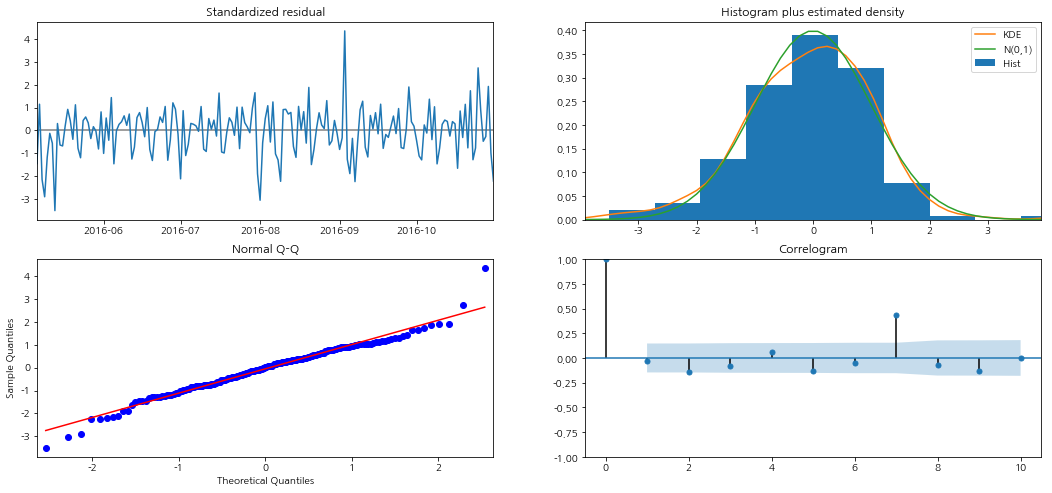

In [537]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

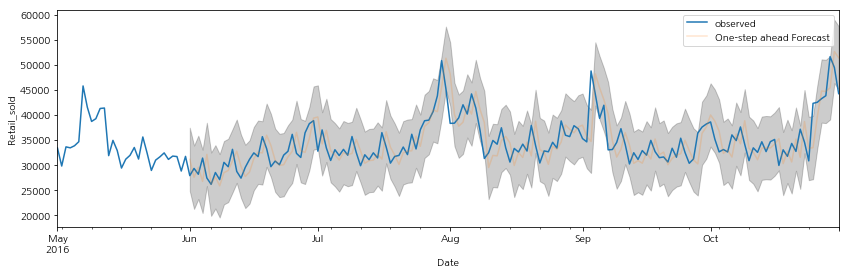

In [546]:
pred = results.get_prediction(start=pd.to_datetime('2016-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y[:].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.2, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')

plt.legend()
plt.show()

In [541]:
y_forecasted = pred.predicted_mean
y_truth = y[:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 11188256.91
The Root Mean Squared Error is 3344.89


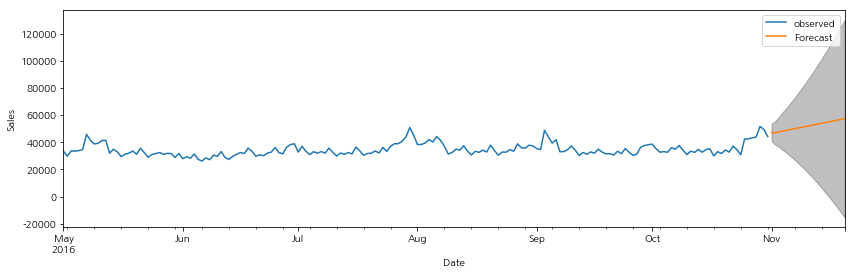

In [550]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [543]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2016-06-01    31177.249503
2016-06-02    27607.558454
2016-06-03    29588.861992
2016-06-04    26785.941708
2016-06-05    32170.643487
2016-06-06    26221.117350
2016-06-07    27693.047960
2016-06-08    25893.367005
2016-06-09    28514.758427
2016-06-10    28972.540250
2016-06-11    30858.635942
2016-06-12    32810.746647
Freq: D, dtype: float64

In [544]:
pred_ci.head(24)

,lower amount,upper amount
2016-06-01,24851.556214,37502.942793
2016-06-02,21282.635256,33932.481651
2016-06-03,23264.649399,35913.074584
2016-06-04,20462.369228,33109.514189
2016-06-05,25847.659657,38493.627316
2016-06-06,19898.666092,32543.568608
2016-06-07,21371.085383,34015.010537
2016-06-08,19571.847920,32214.886091
2016-06-09,22193.645719,34835.871134
2016-06-10,22651.797153,35293.283347


In [547]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2016-11-01    47225.756077
2016-11-02    46960.199635
2016-11-03    47724.277487
2016-11-04    48345.946557
2016-11-05    48789.647767
2016-11-06    49491.169407
2016-11-07    49948.314552
2016-11-08    50607.142518
2016-11-09    51110.140423
2016-11-10    51729.217156
2016-11-11    52263.706144
2016-11-12    52858.986905
Freq: D, dtype: float64

### 4

## 그래프 정리

### 예측 데이터 프레임 생성

In [204]:
df_forecast = pd.DataFrame(index=pd.date_range("2016-11-01", "2016-12-31"))
df_forecast['amount'] = 0


In [205]:
# #month one hot encoding
# df_forecast['month'] = df_forecast.index.month
# month_dummies = pd.get_dummies(df_forecast['month'],prefix='month')
# df_forecast = pd.concat([df_forecast, month_dummies], axis=1, join_axes=[df_forecast.index]).drop(['month'],axis=1)

#dayofweek one hot encoding
df_forecast['weekday'] = df_forecast.index.weekday
week_dummies = pd.get_dummies(df_forecast['weekday'],prefix='weekday')
df_forecast = pd.concat([df_forecast, week_dummies], axis=1, join_axes=[df_forecast.index]).drop(['weekday'],axis=1)

#Satday,Sunday
df_forecast['weekend'] = (df_forecast.index.weekday>4).astype(int)

#quarter
# df_forecast['quarter'] = df_forecast.index.month
# df_forecast['quarter'][df_forecast['quarter']==1]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==2]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==3]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==4]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==5]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==6]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==7]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==8]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==9]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==10]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==11]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==12]='4Q'
# quarter_dummies = pd.get_dummies(df_forecast['quarter'],prefix='quarter')
# df_forecast = pd.concat([df_forecast, quarter_dummies], axis=1, join_axes=[df_forecast.index]).drop(['quarter'],axis=1)

# #holiday
# holiday=['2016-01-01', # 1월 신정 연휴
#         '2016-01-02', # 1월 신정 연휴
#         '2016-01-03', # 1월 신정 연휴
#         '2016-02-06', # 2월 설날 연휴
#         '2016-02-07', # 2월 설날 연휴
#         '2016-02-08', # 2월 설날 연휴
#         '2016-02-09', # 2월 설날 연휴
#         '2016-02-10', # 2월 설날 연휴
#         '2016-03-01', # 3월 3.1절
#         '2016-04-13', # 4월 국회의원 선거일
#         '2016-05-05', # 5월 어린이날
#         '2016-05-14', # 5월 석가탄신일
#         '2016-06-06', # 6월 현충일
#         '2016-08-15', # 8월 광복절
#         '2016-09-14', # 9월 추석 연휴
#         '2016-09-15', # 9월 추석 연휴
#         '2016-09-16', # 9월 추석 연휴
#         '2016-09-17', # 9월 추석 연휴
#         '2016-09-18', # 9월 추석 연휴
#         '2016-10-01', # 10월 개천절 연휴
#         '2016-10-02', # 10월 개천절 연휴
#         '2016-10-03', # 10월 개천절 연휴
#         '2016-12-25'] # 12월 크리스마스
# df_forecast['holiday'] = (df_forecast.index.isin(holiday)).astype(int)

#querter_end
querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
               '2016-06-29', '2016-06-30', # 2분기 말
               '2016-09-29', '2016-09-30', # 3분기 말
               '2016-12-30', '2016-12-31'] # 4분기 말
df_forecast['querter_end'] = (df_forecast.index.isin(querter_end)).astype(int)


# holiday
# special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
#                '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
#                '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
#                '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
#                '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
#                '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
#                '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
#                '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
#                '2016-10-29', '2016-10-30', '2016-10-31', 
#                '2016-12-24', '2016-12-25', '2016-12-22016-08-09	-5600.0
#                '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',] # 연말




# special_event=['2016-09-03',
#                 '2016-05-07',
#                 '2016-10-26',
#                 '2016-07-30',
#                 '2016-09-04',
#                 '2016-10-29',
#                 '2016-10-25',
#                 '2016-05-08',
#                 '2016-06-29',
#                 '2016-09-29',
#                 '2016-09-28',
#                 '2016-10-30',
#                 '2016-07-26',
#                 '2016-07-29',
#                 '2016-08-27',
#                 '2016-09-10',
#                 '2016-06-25',
#                 '2016-06-28',
#                 '2016-07-16','2016-12-24','2016-12-25','2016-12-26','2016-12-30',
#               '2016-12-31']


# special_event=['2016-09-03','2016-10-25','2016-05-07',
#         '2016-10-29','2016-07-30','2016-08-27','2016-09-28',
#         '2016-08-20','2016-07-16','2016-06-28']

df_forecast['special_event'] = (df_forecast.index.isin(special_event)).astype(int)

# # down_event
# down_event=['2016-05-13','2016-08-08','2016-08-09','2016-09-07','2016-11-01','2016-11-02']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)

# down_event
# down_event=['2016-05-13','2016-09-07','2016-08-01',
#             '2016-07-01','2016-07-31',
#             '2016-08-09','2016-10-31','2016-10-17',
#             '2016-09-05','2016-09-04',
#              '2016-11-01','2016-11-02','2016-11-03'
#             ]
# df_forecast['down_event'] = (df_forecast.index.isin(down_event)).astype(int)


# down_event=['2016-05-13','2016-09-07','2016-08-01','2016-07-01',
#             '2016-07-31','2016-08-09','2016-10-31',
#             '2016-10-17','2016-09-05','2016-09-04',
#             '2016-11-01','2016-11-02','2016-11-03','2016-11-04']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)




### column 맞추기

In [206]:
for col in df_new.columns:
    if col not in df_forecast.columns:
        print(col)
        df_forecast[col]=0

quarter_1Q
quarter_2Q
quarter_3Q
quarter_4Q
down_event


In [214]:
df_new.tail()

,amount,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekend,quarter_1Q,quarter_2Q,quarter_3Q,quarter_4Q,querter_end,special_event,down_event
date,,,,,,,,,,,,,,,,
2016-10-27,43300,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2016-10-28,43885,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2016-10-29,51680,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2016-10-30,49515,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2016-10-31,44300,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


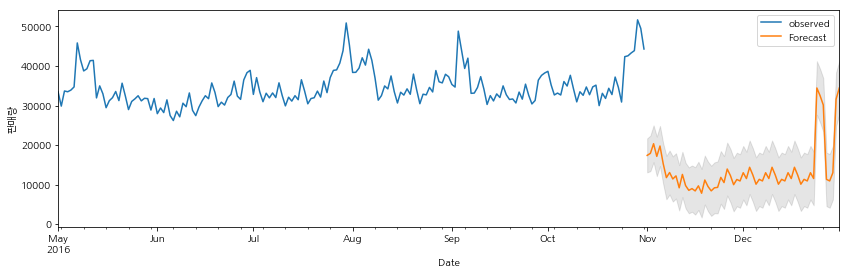

In [213]:
y = df_new['amount']
y_exog = df_new.drop('amount',axis=1)

mod = sm.tsa.statespace.SARIMAX(y,
                                exog=y_exog,
                                order=(1, 0, 28),
                                #trend='n',
                                seasonal_order=(0, 0, 0, 0),
                                freq = 'D',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
# print(results.summary().tables[1])


# _exog = df_forecast.drop('amount',axis=1)
# _exog = df_new_train.drop('amount',axis=1).append(df_new_test.drop('amount',axis=1))
# _exog = _exog.append(df_forecast.drop('amount',axis=1))
_exog = df_forecast.drop('amount',axis=1)

pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('판매량')
plt.legend()
plt.show()


In [392]:
pred_uc.predicted_mean.head(10)

2016-11-01    47363.442372
2016-11-02    47992.616569
2016-11-03    48394.527908
2016-11-04    49787.514532
2016-11-05    54702.309884
2016-11-06    50764.445196
2016-11-07    45516.461338
2016-11-08    46777.656672
2016-11-09    45287.334779
2016-11-10    47880.764597
Freq: D, dtype: float64

In [ ]:

for i in range(20):
    print(i)
    s_order = (2, 1, 0, i)
    mod = sm.tsa.statespace.SARIMAX(y,
                                exog=y_exog,
                                order=(2, 1, 0),
                                seasonal_order=s_order)
    results = mod.fit()
    # print(results.summary().tables[1])

    # _exog = df_forecast.drop('amount',axis=1)
    # _exog = df_new_train.drop('amount',axis=1).append(df_new_test.drop('amount',axis=1))
    # _exog = _exog.append(df_forecast.drop('amount',axis=1))
    _exog = df_forecast.drop('amount',axis=1)

    pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
    # pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 4))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('판매량')
    plt.legend()
    plt.show()

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

### 예측 그래프

In [59]:
# _exog = df_forecast.drop('amount',axis=1)
_exog = df_new_train.drop('amount',axis=1).append(df_new_test.drop('amount',axis=1))
_exog = _exog.append(df_forecast.drop('amount',axis=1))
# _exog

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [60]:
_exog = df_forecast.drop('amount',axis=1)

pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('판매량')
plt.legend()
plt.show()_exog = df_forecast.drop('amount',axis=1)

pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('판매량')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-60-acbb1bb587c8>, line 13)

### 정확도 확인 그래프

In [ ]:
pred = results.get_prediction(full_results=True,dynamic=False)
pred_ci = pred.conf_int()
ax = y[:].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=1, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('판매량')

plt.legend()
plt.show()

In [ ]:
pred.predicted_mean

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y[:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

### predicted_mean

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

In [ ]:
pred_ci.head(24)

In [ ]:
forecast = pred_uc.predicted_mean
forecast.head(12)

## 모델 분석

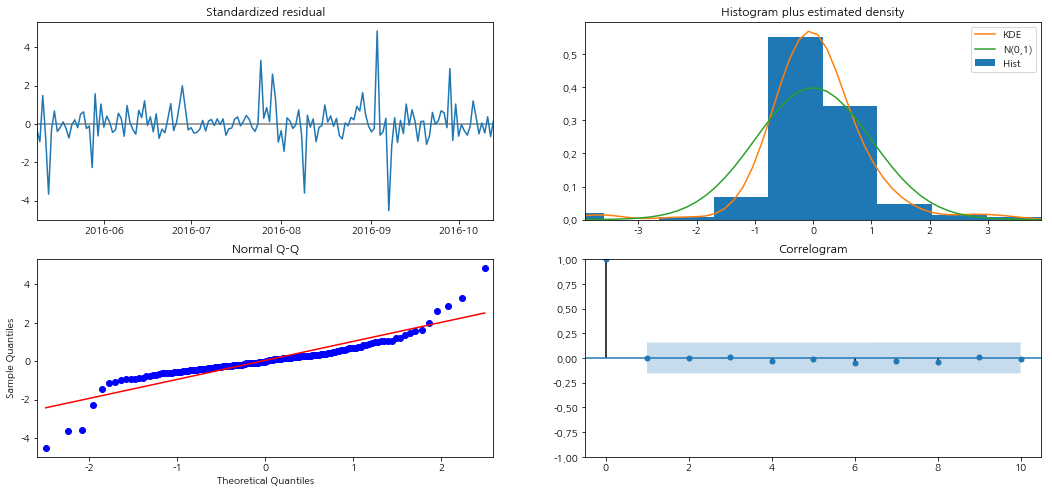

In [341]:
arimax.plot_diagnostics(figsize=(18, 8))
plt.show()

ValueError: Provided exogenous values are not of the appropriate shape. Required (166, 15), got (166, 1).

In [ ]:
mse

## 최적 모델 찾기

In [ ]:
# from sklearn.metrics import mean_squared_error

# li = []

# for i in range(7):
#     for j in range(2):
#         for k in range(7):
#             arimax = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
#                                                order=(i,j,k),
#                  arimax.resid.plot();plt.show()                              seasonal_order=(0,0,0,0),
#                                                exog = df_new_train.drop(['amount'],axis = 1),
#                                                freq='D',
#                                                enforce_stationarity=False,
#                                                enforce_invertibility=False,).fit()

#             pred = arimax.predict(train_end,test_end,exog = df_new_test.drop(['amount'],axis = 1))[1:]
#             print('{},{},{} - ARIMAX model MSE:{}'.format(i,j,k,mean_squared_error(df_new_test['amount'],pred)))
#             li.append([i,j,k,mean_squared_error(df_new_test['amount'],pred)])
            
# arimax.summary()
# #We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

In [ ]:
res = arimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [ ]:
arimax.plot_diagnostics(figsize=(15, 12))

# arimax 2

In [1298]:
import pyflux as pf

ModuleNotFoundError: No module named 'pyflux'